<p style = "font-size : 50px; color : blue ; font-family : 'Comic Sans MS'; text-align : center; background-color : yellow; border-radius: 5px 5px;"><strong>Objective</strong></p>

1. Basic EDA includes most participated player. Most wins by a team (not only finals).
2. Advance EDA Best performing Players though out the IPL all seasons.

<p style = "font-size : 20px; color : black ; font-family : 'Comic Sans MS'; text-align : center; background-color : #F4E0FF; border-radius: 5px 5px;"><strong>Try to find out answers of</strong></p>
1. Is there any correlation between Venue and Winning team
2. Does Toss affect match outcome
3. Does Batting 1st or 2nd impact the outcome?
4. 

In [1]:
import numpy as np # linear algebra
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Packages for Visualisation 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.



/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv
/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv


In [2]:
# Importing packages for Predictions
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import tree

In [3]:
# Defining a function to print side by side
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# this works 
#df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['A','B','C','D',])
#df2 = pd.DataFrame(np.arange(16).reshape((4,4)),columns=['A','B','C','D',])

#df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
#df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')

#display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

<p style = "font-size : 25px; color : grey ; font-family : 'Comic Sans MS'; text-align : center; background-color : null; border-radius: 5px 5px;"><strong>1. Data Loading & basic analysis </strong></p>

In [4]:
byb=pd.read_csv('../input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv')
match= pd.read_csv('../input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')

# Change the name of Delhi Daredevils to Delhi Capital

In [5]:
# ball by ball
byb

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [6]:
# Match Data set
match

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [7]:
print(byb.columns)
print(match.columns)

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')
Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')


In [8]:
byb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [9]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

Method have a lot of null values lets check what are the unique value does method have.

* So it turns our in 19 matches outcome was decided by D/L method.

The Duckworth–Lewis–Stern method (DLS) is a mathematical formulation designed to calculate the target score for the team batting second in a limited overs cricket match interrupted by weather or other circumstances. The method was devised by two English statisticians, Frank Duckworth and Tony Lewis, and was formerly known as the Duckworth–Lewis method (D/L).[1] It was introduced in 1997, and adopted officially by the ICC in 1999. 

In [10]:
# Checking match win total null values
match['winner'].isnull().sum()

4

In [11]:
# Checking null match values
# I Checked the internet these matches were called off
# So we could simply removes these columns

match[match['winner'].isnull()==True]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [12]:
match[match['result']=='tie']
# So far 13 match are tie and we can see eliminator column is having Y  

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


In [13]:
match.method.unique()

array([nan, 'D/L'], dtype=object)

In [14]:
# Check the no match each team won
match['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [15]:
match['team1'].value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Name: team1, dtype: int64

In [16]:
match['team2'].value_counts()

Mumbai Indians                 106
Kings XI Punjab                 98
Kolkata Knight Riders           97
Rajasthan Royals                91
Royal Challengers Bangalore     87
Chennai Super Kings             84
Delhi Daredevils                78
Sunrisers Hyderabad             65
Deccan Chargers                 36
Pune Warriors                   23
Gujarat Lions                   14
Delhi Capitals                  14
Rising Pune Supergiant           9
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Name: team2, dtype: int64

1. We need to merge Delhi capitals and Delhi DareDevil into **Delhi Capital** as it has been renamed to Delhi Capital.
2. There is problem with Rising Pune Supergiant as 's' is added at some places.


<p style = "font-size : 25px; color : black ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D07FFF; border-radius: 5px 5px;"><strong>2.Exploratory Data Analysis (EDA)</strong></p> 
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

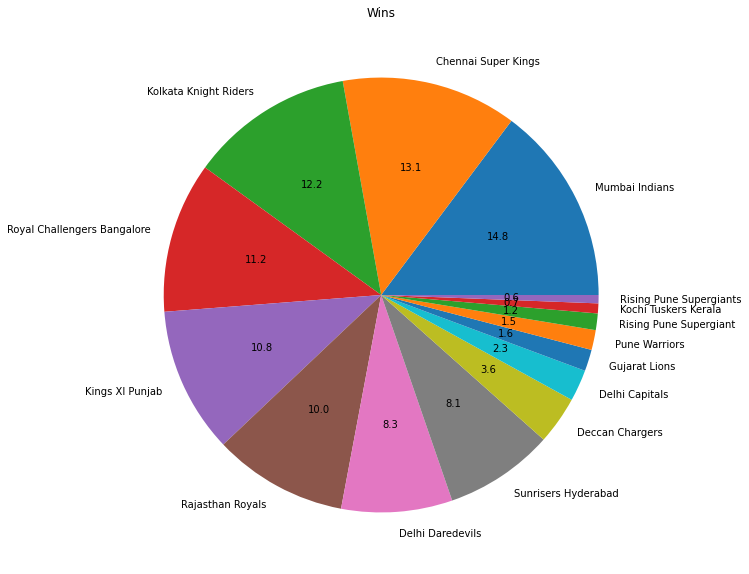

In [17]:
# Most wins in IPL
temp = pd.DataFrame({'Winner': match['winner']})
count_win = temp.value_counts()
# Count_wins is a dictionary; with key being Mumbai Indian and all

# creating label : containing team's name

labels= [I[0] for I in count_win.keys()]


#count_win.bar()
'''plt.bar(count_win)
plt.show()'''

bar, ax= plt.subplots(figsize=(10,10))
ax=plt.pie(x=count_win, autopct="%.1f", labels= labels)
plt.title("Wins")
plt.show()

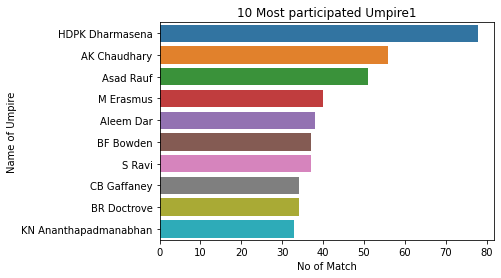

In [18]:
# Top 10 Umpire1 & 2 value count

sns.barplot(x=match['umpire1'].value_counts().head(10).values,
            y=match['umpire1'].value_counts().head(10).index,
            data= match
           )
plt.xlabel("No of Match")
plt.ylabel("Name of Umpire")
plt.title('10 Most participated Umpire1')
plt.show()

In [19]:
# Playing with date
match['Season']= pd.DatetimeIndex(match['date']).year
match.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008


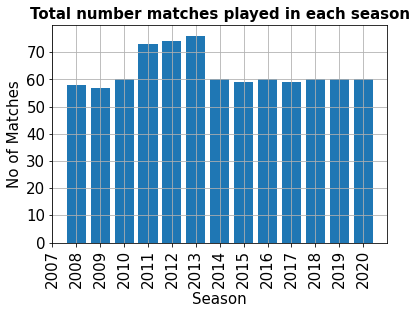

"ax2 = fig.add_subplot(122)\nfont_size=14\nbbox=[0, 0, 1, 1]\nax2.axis('off')\nmpl_table = ax2.table(cellText = mps.values, rowLabels = mps.index, bbox=bbox, colLabels=mps.columns)\nmpl_table.auto_set_font_size(False)\nmpl_table.set_fontsize(font_size)\n"

In [20]:
match_per_season = match.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})

# {'id':'matches'}: Dictionary to convert id columns to matches
# match_per_season
x= match_per_season.Season
y=match_per_season.matches
mps=match_per_season

plt.bar(match_per_season.Season, match_per_season.matches)
plt.xticks(rotation=90)
plt.grid(True)
plt.xticks(list(range(1,max(x)+1)),[str(i) for i in range(1,max(x)+1)], fontsize=15) # To plot X axis with 1 interval
plt.yticks(np.arange(0,80,step=10), fontsize=15) # Here again we are setting frequency using array
plt.xlim([2007, 2021]) # to define limit of x
plt.ylim([0, 80])
plt.xlabel("Season", fontsize=15)
plt.ylabel("No of Matches", fontsize=15)
plt.title('Total number matches played in each season', fontsize=15, fontweight = 'bold')
plt.show()

# Rendering dataframe as matplotlib table
'''ax2 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = mps.values, rowLabels = mps.index, bbox=bbox, colLabels=mps.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
'''

In [21]:
# Mergring season column with byb using lefet joint
season_data= match[['id','Season']].merge(byb,left_on='id',right_on='id',how='left').drop('id', axis=1)
season_data.head(2)

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


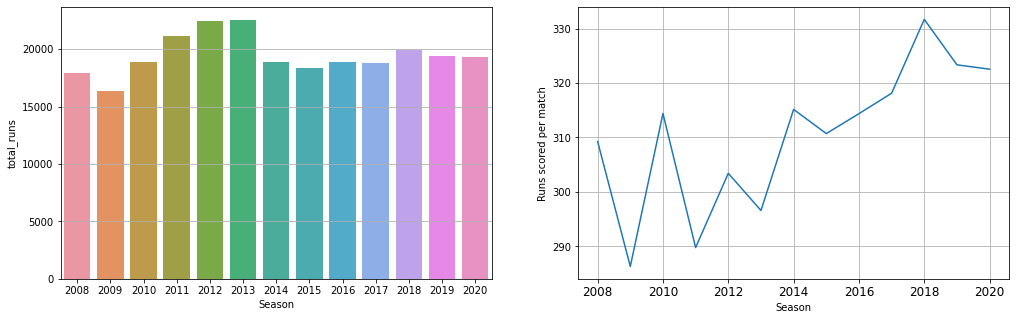

In [22]:
# total Run scored in each season. Total Season Run= sr
# Avg run per Season. average run =ars
# msp= Match per Season

sr = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
ars= pd.concat([mps,sr.iloc[:,1]],axis=1)
ars['Runs scored per match']=ars['total_runs']/ars['matches']
ars.set_index('Season',inplace=True)

# Sub plot in sns

f, axes = plt.subplots(1, 2)
f.set_size_inches(17, 5)
axes[0].grid(True)
axes[1].grid(True)
plt.xticks(fontsize=12)
sns.barplot(x=ars.index,y=ars['total_runs'], data= ars, ax=axes[0]);
sns.lineplot(x=ars.index,y=ars['Runs scored per match'], data= ars, ax=axes[1]);

# ; avoids excess text output

<p style = "font-size : 15px; color : #f5f5f0 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00004d; border-radius: 5px 5px;">Venue and 1st inning</p>


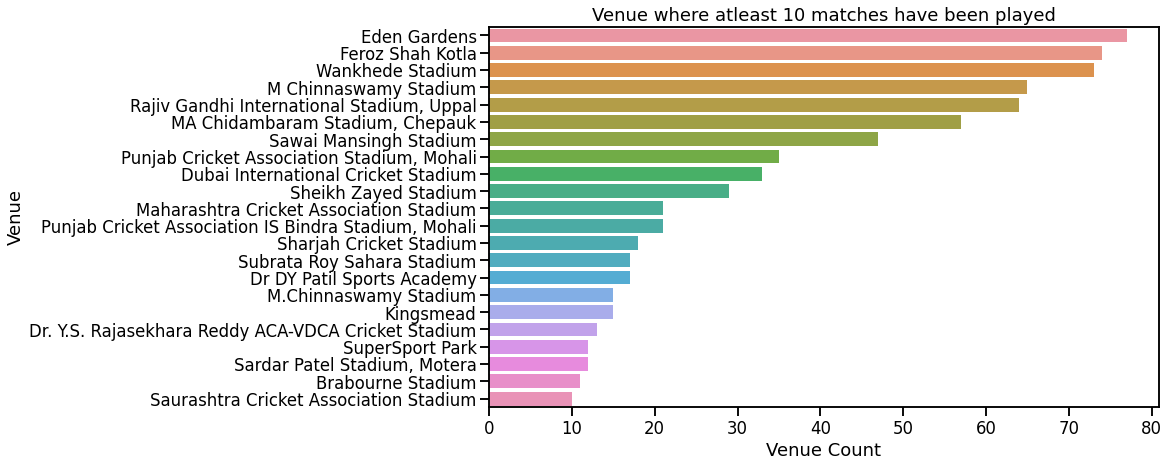

In [23]:
# Venue where atleast 10 matches have been played

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=match['venue'].value_counts().head(22).values,
           y= match['venue'].value_counts().head(22).index,
           data=match)

plt.title('Venue where atleast 10 matches have been played')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

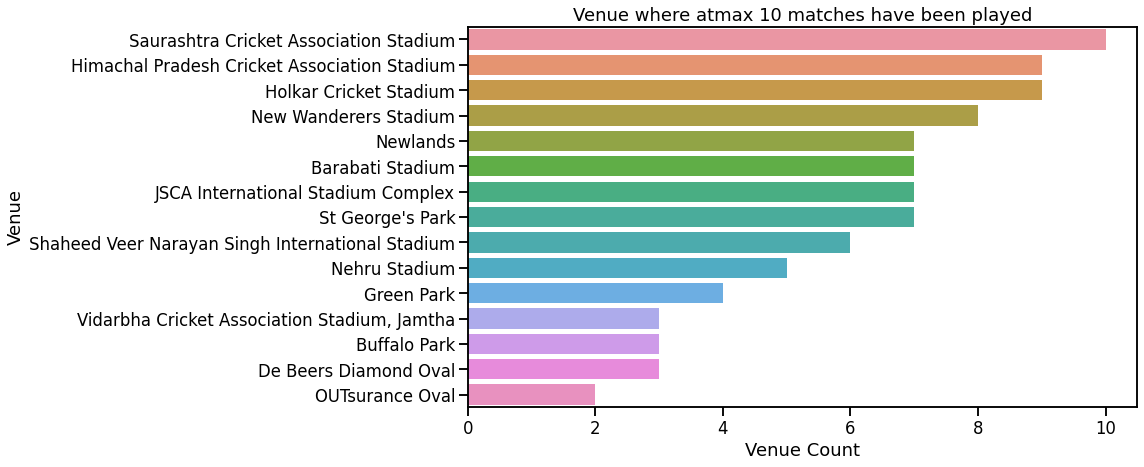

In [24]:
# Venue where atmax 10 matches have been played

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=match['venue'].value_counts().tail(15).values,
           y= match['venue'].value_counts().tail(15).index,
           data=match)

plt.title('Venue where atmax 10 matches have been played')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

In [25]:
# Which Stadium is best for winning by wickets i.e team fielding won the match
match.venue[match.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [26]:
# Which stadium is best for winning by run i.e bat First
match.venue[match.result=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

### Which stadium is best for team when they win the toss
* Principle code
> match.venue[match.toss_winner == 'Kolkata Knight Riders'][match.winner=='Kolkata Knight Riders'].mode()
* Mode : **The mode is the value that appears most frequently in a data set**. A set of data may ***have one mode, more than one mode, or no mode at all***. Other popular measures of central tendency include the mean, or the average of a set, and the median, the middle value in a set.

Refer **List and Dir function** Dir function to check the attributes of an object.

#### Try
a= match.venue[match.toss_winner == 'Kolkata Knight Riders'][match.winner=='Kolkata Knight Riders'].mode()
#print(dir(a))
print(a.values[0])
#print(a.to_string)

In [27]:
# Which stadium is best for team when they win the toss

# Create a list containing complete team name
t= match['team1'].unique()
for i in t:
    venues= match.venue[match.toss_winner == i][match.winner==i].mode()
    for venue in venues:
        print(venue +' is best for '+ i + ' if they won the toss')
        #print()
    print()


# Diagnosis
'''print(a +' is best for '+ i + ' if they won the toss')
    print()'''
    # print(a.values[0])
  #print(venues.values[0] +' is best for '+ i + ' if they won the toss')
    #print()

M Chinnaswamy Stadium is best for Royal Challengers Bangalore if they won the toss

Punjab Cricket Association Stadium, Mohali is best for Kings XI Punjab if they won the toss

Feroz Shah Kotla is best for Delhi Daredevils if they won the toss

Wankhede Stadium is best for Mumbai Indians if they won the toss

Eden Gardens is best for Kolkata Knight Riders if they won the toss

Sawai Mansingh Stadium is best for Rajasthan Royals if they won the toss

Barabati Stadium is best for Deccan Chargers if they won the toss
Dr DY Patil Sports Academy is best for Deccan Chargers if they won the toss
Feroz Shah Kotla is best for Deccan Chargers if they won the toss
Kingsmead is best for Deccan Chargers if they won the toss
MA Chidambaram Stadium, Chepauk is best for Deccan Chargers if they won the toss
SuperSport Park is best for Deccan Chargers if they won the toss

MA Chidambaram Stadium, Chepauk is best for Chennai Super Kings if they won the toss

Feroz Shah Kotla is best for Kochi Tuskers Ker

"print(a +' is best for '+ i + ' if they won the toss')\n    print()"

In [28]:
# Which is the best chasing team
match.winner[match.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [29]:
# Which Team won the most no of matches batting 1st
match.winner[match.result=='runs'].mode()

0    Mumbai Indians
dtype: object

In [30]:
match['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

<p style = "font-size : 15px; color : #f5f5f0 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00004d; border-radius: 5px 5px;"></p>
​

<p style = "font-size : 15px; color : #ff3300 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff33; border-radius: 7px 5px;"><Strong>Toss ka Funda</Strong></p>

In [31]:
# Toss Decision
teams= match['toss_winner'].unique()
decision_making=pd.DataFrame([],columns =['Toss Winner','Decision', 'Times'])

for id, element in enumerate(teams):
    temp_bat=match[(match['toss_winner']== element) & (match['toss_decision']== 'bat')]
    temp_field= match[(match['toss_winner']== element)& (match['toss_decision']=='field')]
    
    #append to decision making
    decision_making = decision_making.append({'Toss Winner': element, 'Decision':'bat', 
                                              'Times' :temp_bat['toss_winner'].count()},ignore_index= True)
    
    # For Feild
    decision_making = decision_making.append({'Toss Winner': element, 'Decision':'field', 
                                              'Times' :temp_field['toss_winner'].count()},ignore_index= True)

In [32]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


Toss fig 1


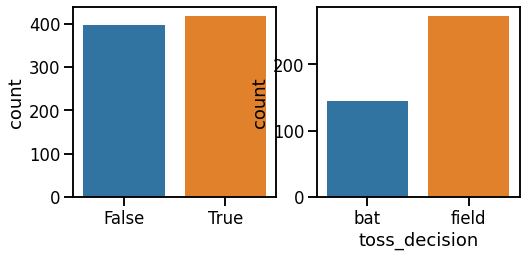

In [33]:
# Toss won vs match won
toss= match['toss_winner']==match['winner']
# who won more, 1 who choose batting or the one who choose fielding
decision= match.toss_decision[match.toss_winner==match.winner]

print('Toss fig 1')
f, ax =  plt.subplots(1,2,figsize=(8,3.5))
sns.countplot(toss,ax=ax[0])
sns.countplot(decision ,ax=ax[1])
plt.show()

Toss fig 2


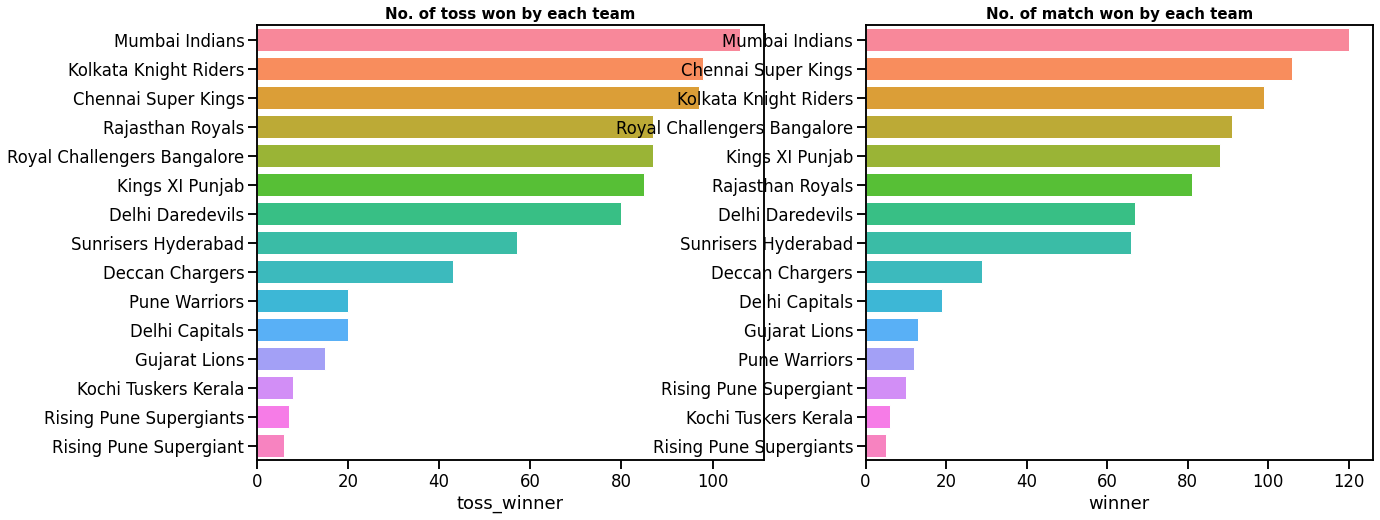

In [34]:
# Tosses won by each team &
toss= match['toss_winner'].value_counts()
# sns.set(rc={'figure.figsize':(12,8)}, style='darkgrid')

# No of match won by each team
win=match.winner.value_counts()

print('Toss fig 2')

f, ax =  plt.subplots(1,2,figsize=(20,8))

sns.set(font_scale=1.2)  # to resize x & y ticks just remember its scale not size
sns.barplot(y=toss.index, x= toss, orient = 'h', saturation=1, ax=ax[0])
ax[0].set_title('No. of toss won by each team', fontweight='bold', fontsize=15 )
sns.barplot(y=win.index, x= win, orient = 'h', saturation=1, ax=ax[1])
ax[1].set_title('No. of match won by each team', fontweight='bold', fontsize=15 )
# plt.yticks(fontsize=12)
plt.show()

Toss fig 3


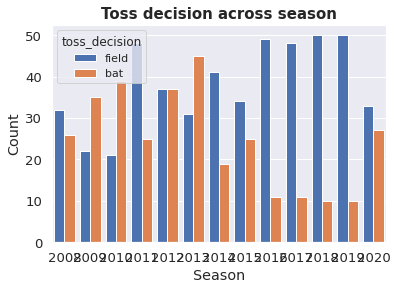

In [35]:
print('Toss fig 3')
ax= plt.axes()
sns.set(rc={'figure.figsize':(12,8)}, style='darkgrid')
ax.set_title('Toss decision across season', fontsize=15, fontweight='bold')
sns.countplot(x='Season', hue='toss_decision' ,data = match, saturation=1)
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

### Conclusion of Toss ka Funda
**fig 1** : there is very slight edge to toss winning team. Plus we also observe that *team who won toss and choose to field have more chance of winning the match.*

**fig 2 :** So does it mean winning the toss is directly proportional to winning the match as both graph seems correlated?
> **No**, see the previous graph we can see the exact relationship between match won and toss won. It certainly gives edge but very minor edge.

**fig 3 :** There is a trend seen in matches between 2016-2019 where team prefer to choose fielding rather than batting. How ever in 2020 this trend seem to fade.

In [36]:
# player winning the man of the match max no of time
man_of_the_match= match.player_of_match.value_counts()
man_of_the_match.columns = ['Batsman','man of match']
#man_of_the_match.sort_values('man of match', ascending=False, inplace=True)
mom= man_of_the_match.reset_index()


# Arrange batsman as per total run in IPL
runs= byb.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns =['Batsman','Total run']
runs.sort_values('Total run', ascending=False, inplace=True)
runs.reset_index(inplace=True)
runs.drop('index',axis=1, inplace=True)
print(runs.head(10))
print()
print("Man of the Match")
print()
print(mom.head(10))


'''f, ax = plt.subplot(2,1,figsize=(5,5))

sns.barplot(data=runs.head(10), y='Batsman', x='Total run', ax=ax[0])
sns.barplot(data=mom.head(10), y='index' , x='player_of_match', ax=ax[1])
'''

          Batsman  Total run
0         V Kohli       5878
1        SK Raina       5368
2       DA Warner       5254
3       RG Sharma       5230
4        S Dhawan       5197
5  AB de Villiers       4849
6        CH Gayle       4772
7        MS Dhoni       4632
8      RV Uthappa       4607
9       G Gambhir       4217

Man of the Match

            index  player_of_match
0  AB de Villiers               23
1        CH Gayle               22
2       RG Sharma               18
3       DA Warner               17
4        MS Dhoni               17
5       SR Watson               16
6       YK Pathan               16
7        SK Raina               14
8         V Kohli               13
9       G Gambhir               13


"f, ax = plt.subplot(2,1,figsize=(5,5))\n\nsns.barplot(data=runs.head(10), y='Batsman', x='Total run', ax=ax[0])\nsns.barplot(data=mom.head(10), y='index' , x='player_of_match', ax=ax[1])\n"

In [37]:
# Store top 10 players as per total run they score in list
players_name = runs['Batsman'].head(10).to_list()
# players_name

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col f

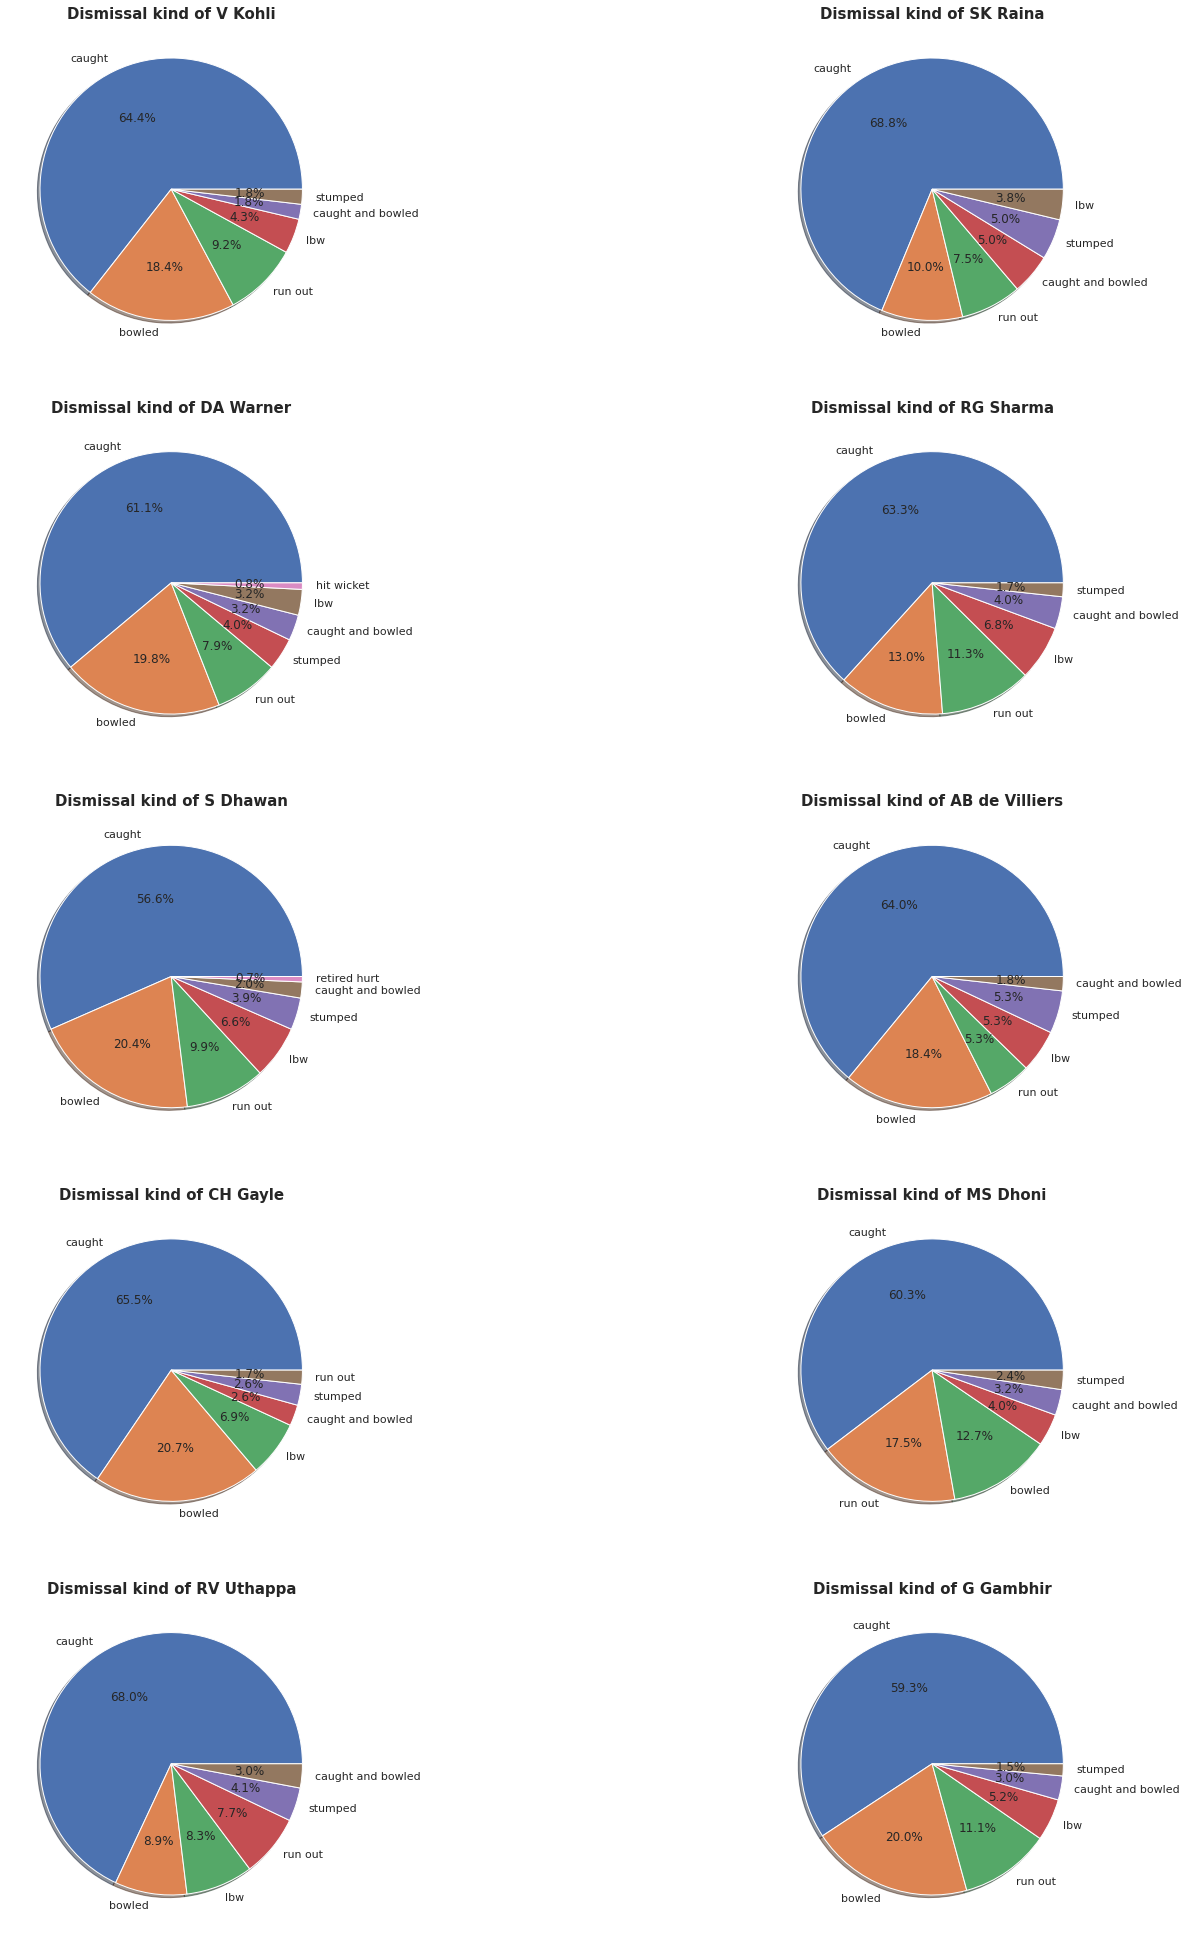

In [38]:
# Dismissal of top 10 batsman

f, ax = plt.subplots(5,2,figsize=(25,35))
'''f.set_figheight(15)
f.set_figwidth(15)'''
ax = ax.flatten()

j=0
for i in players_name:
    player = (byb['batsman']==i)
    current_player = byb[player]
    current_player['dismissal_kind'].value_counts().plot.pie( ax=ax[j],autopct='%1.1f%%', shadow=True,rotatelabels=False)
    ax[j].set_title('Dismissal kind of '+i , fontweight= 'bold', fontsize=15)
    ax[j].set_ylabel('')
    ax[j].set_xlabel('')
    j=j+1 
   


#### Calculate dismissal of MS Dhoni
a= 'MS Dhoni'
player = (byb['batsman']=='MS Dhoni')
df_dhoni=byb[player]
df_dhoni['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=False)
plt.title('Dismissal kind of '+ a, fontweight= 'bold', fontsize=15)
plt.show()

In [39]:
# count single, double, triple, boundry and sixes for each player from top 10

for i in players_name:
    player = (byb['batsman']==i)
    current_player = byb[player]
    def count (current_player,runs):
        return len(current_player[current_player['batsman_runs']==runs])*runs
    print('Score distribution of '+ i)
    print('Runs scored from 1s :', count(current_player,1), '     And no of 1s = ',count(current_player,1)/1)
    print('Runs scored from 2s :', count(current_player,2), '      And no of 2s = ',count(current_player,2)/2)
    print('Runs scored from 3s :', count(current_player,3), '       And no of 3s = ',count(current_player,3)/3)
    print('Runs scored from 4s :', count(current_player,4), '     And no of 4s = ',count(current_player,4)/4)
    print('Runs scored from 6s :', count(current_player,6), '     And no of 6s = ',count(current_player,6)/6)
    print()


Score distribution of V Kohli
Runs scored from 1s : 1919      And no of 1s =  1919.0
Runs scored from 2s : 692       And no of 2s =  346.0
Runs scored from 3s : 39        And no of 3s =  13.0
Runs scored from 4s : 2016      And no of 4s =  504.0
Runs scored from 6s : 1212      And no of 6s =  202.0

Score distribution of SK Raina
Runs scored from 1s : 1666      And no of 1s =  1666.0
Runs scored from 2s : 528       And no of 2s =  264.0
Runs scored from 3s : 33        And no of 3s =  11.0
Runs scored from 4s : 1972      And no of 4s =  493.0
Runs scored from 6s : 1164      And no of 6s =  194.0

Score distribution of DA Warner
Runs scored from 1s : 1348      And no of 1s =  1348.0
Runs scored from 2s : 634       And no of 2s =  317.0
Runs scored from 3s : 57        And no of 3s =  19.0
Runs scored from 4s : 2040      And no of 4s =  510.0
Runs scored from 6s : 1170      And no of 6s =  195.0

Score distribution of RG Sharma
Runs scored from 1s : 1663      And no of 1s =  1663.0
Runs sc

# Race Bar Chart Matplotlib

How to do this
**Rough Idea** 
> might have to use feature engineering then cumulative no and then 
1. cum_race_df= race_df.cumsum(axis=0)
2. Install : !pip install bar-chart-race
3. import bar_chart_race as bcr
            bcr.bar_chart_race(df= cum_race_df,figsize=(3, 3), title="CryptoCurrency Race")

In [40]:
# Race chart graph for best batsman
rcg=byb[['batsman','batsman_runs']]
rcg

,batsman,batsman_runs
0,RT Ponting,1
1,BB McCullum,1
2,BB McCullum,0
3,BB McCullum,1
4,RT Ponting,1
...,...,...
193463,RR Pant,0
193464,RR Pant,1
193465,RR Pant,0
193466,RR Pant,1


In [41]:
# Race Bar Chart for Best team to win most IPL Match
match_race= match[['date','winner']]
match_race

,date,winner
0,2008-04-18,Kolkata Knight Riders
1,2008-04-19,Chennai Super Kings
2,2008-04-19,Delhi Daredevils
3,2008-04-20,Royal Challengers Bangalore
4,2008-04-20,Kolkata Knight Riders
...,...,...
811,2020-09-28,Royal Challengers Bangalore
812,2020-11-05,Mumbai Indians
813,2020-11-06,Sunrisers Hyderabad
814,2020-11-08,Delhi Capitals


# 3. Data Preparation for Prediction
* Label encoding 
* One-Hot encoding
Basically ML understands no better than string so we will convert team name to no.

# 4. Modeling
* splitting the dataset
* Choosing the ML algorithm
* Cross Validation
* Checking the model on test data

[Continue from here](https://www.youtube.com/watch?v=7rCW8fLdJGc)

# Glossory
1. SubPlot in Matplotlib
> Matplotlib’spyplot API has a convenience function called subplots() which acts as a utility wrapper and helps in creating common layouts of subplots, including the enclosing figure object, in a single call.
> Plt.subplots(nrows, ncols)
> The two integer arguments to this function specify the number of rows and columns of the subplot grid. The function returns a figure object and a tuple containing axes objects equal to nrows*ncols. Each axes object is accessible by its index. Here we create a subplot of 2 rows by 2 columns and display 4 different plots in each subplot.

